## Assessment Title: Integrated CA 

## Lecturer Name: David McQuaid & Muhammad Iqbal

## Student Full Name & Student ID:  Deniz OZSOY UGUR - 2023195 

### Link to Dataset

https://data.gov.ie/dataset/dublin-ringsend-rainfall-data?package_type=dataset

### GitHub Repository: 

https://github.com/denizozsoyugur/2023195_Integrated_CA

# Introduction

In [1]:
#pip install dash dash-core-components dash-html-components dash-table plotly

In [2]:
#pip install dash-bootstrap-components

In [3]:
#pip install plotly

In [4]:
#pip install pandas

In [5]:
#pip install --upgrade transformers

In [6]:
# Import NumPy, Pandas, Matplotlib, Seaborn libraries and Plotly Express

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar

from dateutil.parser import parse 
import matplotlib as mpl
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [7]:
# Import warnings and apply filterwarnings to ignore them.

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("irish_monthly_rainy_weather.csv")

# pd.read_csv function in order to read the csv file

In [9]:
df.head(5)

#  Print the first 5 rows of the dataframe by applying the.head() function

,year,month,ind,rain,gdf,rd,wd
0,1941,1,0,112.8,13,18,18
1,1941,2,0,69.5,13,22,15
2,1941,3,0,111,50,21,13
3,1941,4,0,68.6,16.5,15,12
4,1941,5,0,66.4,20.1,13,10


In [10]:
missing_values = ['/',' ','-','--','na','Na','n/a','NA','n.a.','?','nan','Nan','nul','Nul','null','Null']

df= pd.read_csv('irish_monthly_rainy_weather.csv',na_values=missing_values)

# Create a list with all the possible missing value formats. Create a name for the dataframe as report
# ('irish_monthly_rainy_weather')and apply the pd.read_csv function 
# Include the variable 'na_values' and define it with the 'missing values' list previously created

In [11]:
df.isnull().sum()

# Check missing values by applying the .isnull().sum method to the dataframe

year       0
month      0
ind        0
rain      50
gdf      104
rd        91
wd        91
dtype: int64

In [12]:
df.isnull().sum() / len(df) * 100

# Check missing values by applying the .isnull().sum method to the dataframe and divide it by the length of the dataframe,
# calculated with the len() function. Then, multiply the result * 100 to obtain a percentage

year      0.000000
month     0.000000
ind       0.000000
rain      5.192108
gdf      10.799585
rd        9.449637
wd        9.449637
dtype: float64

In [13]:
df.columns

# Check the column names of the dataframe by applying the .columns attribute

Index(['year', 'month', 'ind', 'rain', 'gdf', 'rd', 'wd'], dtype='object')

In [14]:
df.rename(columns={'year':'Year', 
                   'month':'Month', 'ind':'Indicator','rain':'Precipitation_Amount','gdf':'Greatest_Daily_Fall',
                   'rd':'Number_of_Rainy_Days', 'wd':'Number_of_Wet_Days'}, inplace=True)

# Rename the columns of the dataframe by applying the .rename() method

In [15]:
df.drop(columns=["Indicator"], inplace=True)

# Apply .drop() to remove the column as it contains the same index values

In [16]:
df.head(2)

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days
0,1941,1,112.8,13.0,18.0,18.0
1,1941,2,69.5,13.0,22.0,15.0


In [17]:
# I am creating a list of the columns to convert. These columns currently contain an object data type
# and missing values. To convert them, missing values will be replaced with '0'. Afterwards,
# the values will be converted from object to numeric to utilise all the features that apply to numeric data types

cols_to_convert = ['Year','Month','Precipitation_Amount',
                   'Greatest_Daily_Fall',
                   'Number_of_Rainy_Days','Number_of_Wet_Days']

In [18]:
# Fill the missing values with 0 for the specified columns by applying the .fillna() method

df[cols_to_convert] = df[cols_to_convert].fillna(0)

In [19]:
# Calculating the percentage of missing values in each column obtained by applying the isnull().sum() method to the
#social_housing dataframe and dividing the result by the total number of rows within the dataframe, whose number is obtained by
# applying the .len() function.

df.isnull().sum()/len(df)*100

Year                    0.0
Month                   0.0
Precipitation_Amount    0.0
Greatest_Daily_Fall     0.0
Number_of_Rainy_Days    0.0
Number_of_Wet_Days      0.0
dtype: float64

In [20]:
# Converting the specified columns from object to integer data type by applying the .astype() method

df[cols_to_convert] = df[cols_to_convert].astype(int)

In [21]:
# Displaying the summary information of the dataframe by applying the .info() method

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Year                  963 non-null    int32
 1   Month                 963 non-null    int32
 2   Precipitation_Amount  963 non-null    int32
 3   Greatest_Daily_Fall   963 non-null    int32
 4   Number_of_Rainy_Days  963 non-null    int32
 5   Number_of_Wet_Days    963 non-null    int32
dtypes: int32(6)
memory usage: 22.7 KB


In [22]:
df.isnull().sum()

Year                    0
Month                   0
Precipitation_Amount    0
Greatest_Daily_Fall     0
Number_of_Rainy_Days    0
Number_of_Wet_Days      0
dtype: int64

In [23]:
df.shape

(963, 6)

In [24]:
df.head(5)

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days
0,1941,1,112,13,18,18
1,1941,2,69,13,22,15
2,1941,3,111,50,21,13
3,1941,4,68,16,15,12
4,1941,5,66,20,13,10


In [25]:
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month']. astype(str), format='%Y-%m')

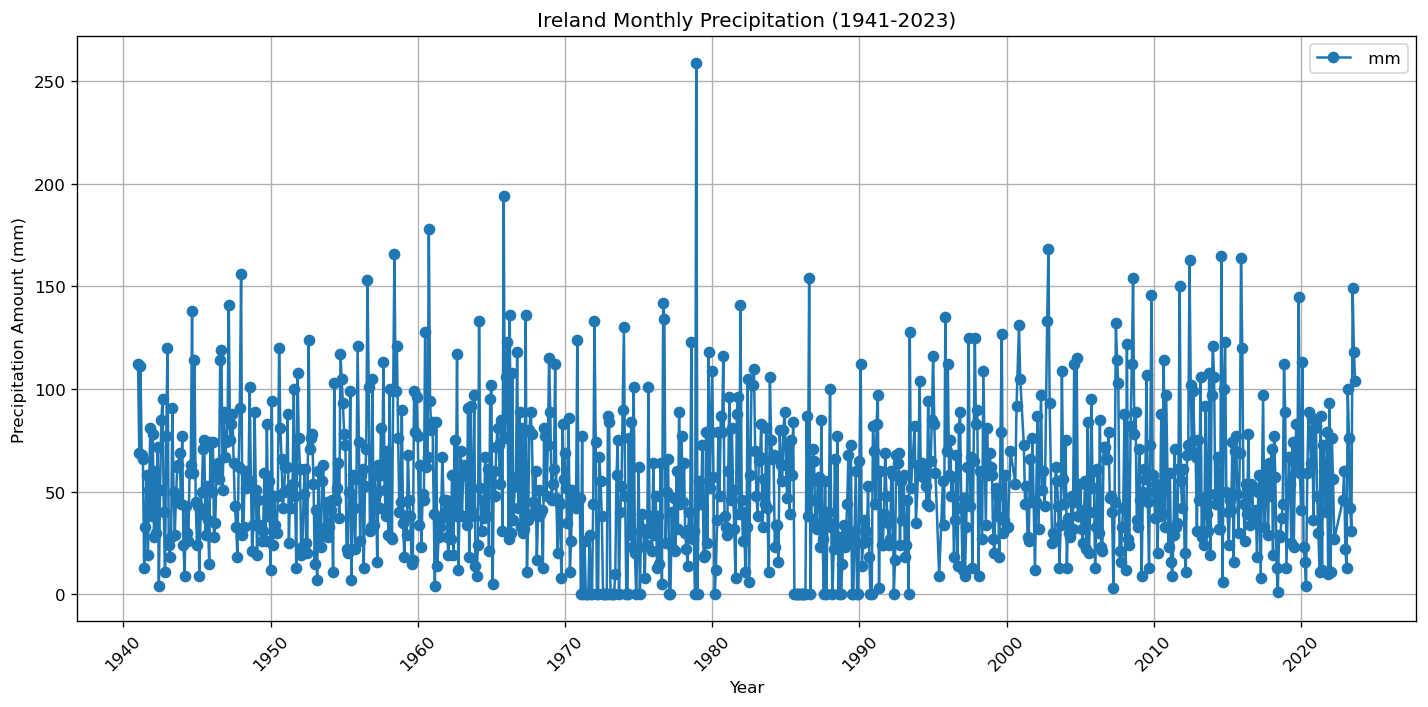

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['Precipitation_Amount'], label=' mm', marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Precipitation Amount (mm)')
plt.title('Ireland Monthly Precipitation (1941-2023)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

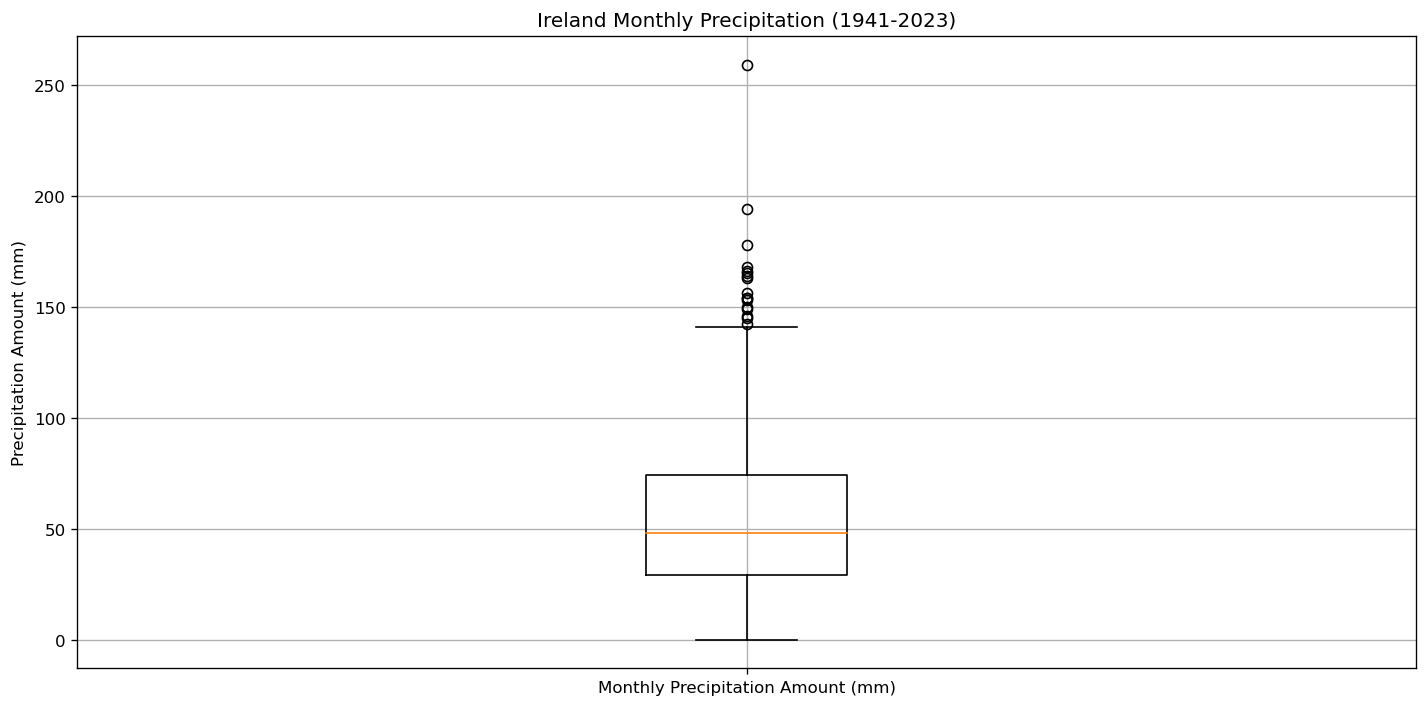

In [27]:
plt.figure(figsize=(12,6))
plt.boxplot(df['Precipitation_Amount'], labels=['Monthly Precipitation Amount (mm)'])

plt.ylabel('Precipitation Amount (mm)')
plt.title('Ireland Monthly Precipitation (1941-2023)')

plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
#Checking the description of data in our dataframe
df.describe()

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,1981.166147,6.484943,53.791277,13.298027,13.149533,9.471443
std,23.848870,3.462380,34.935061,10.423639,6.335268,5.036041
min,1941.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1961.000000,3.000000,29.000000,7.000000,10.000000,6.000000
50%,1981.000000,6.000000,48.000000,11.000000,14.000000,10.000000
75%,2002.000000,9.500000,74.000000,18.000000,17.500000,13.000000
max,2023.000000,12.000000,259.000000,80.000000,29.000000,24.000000


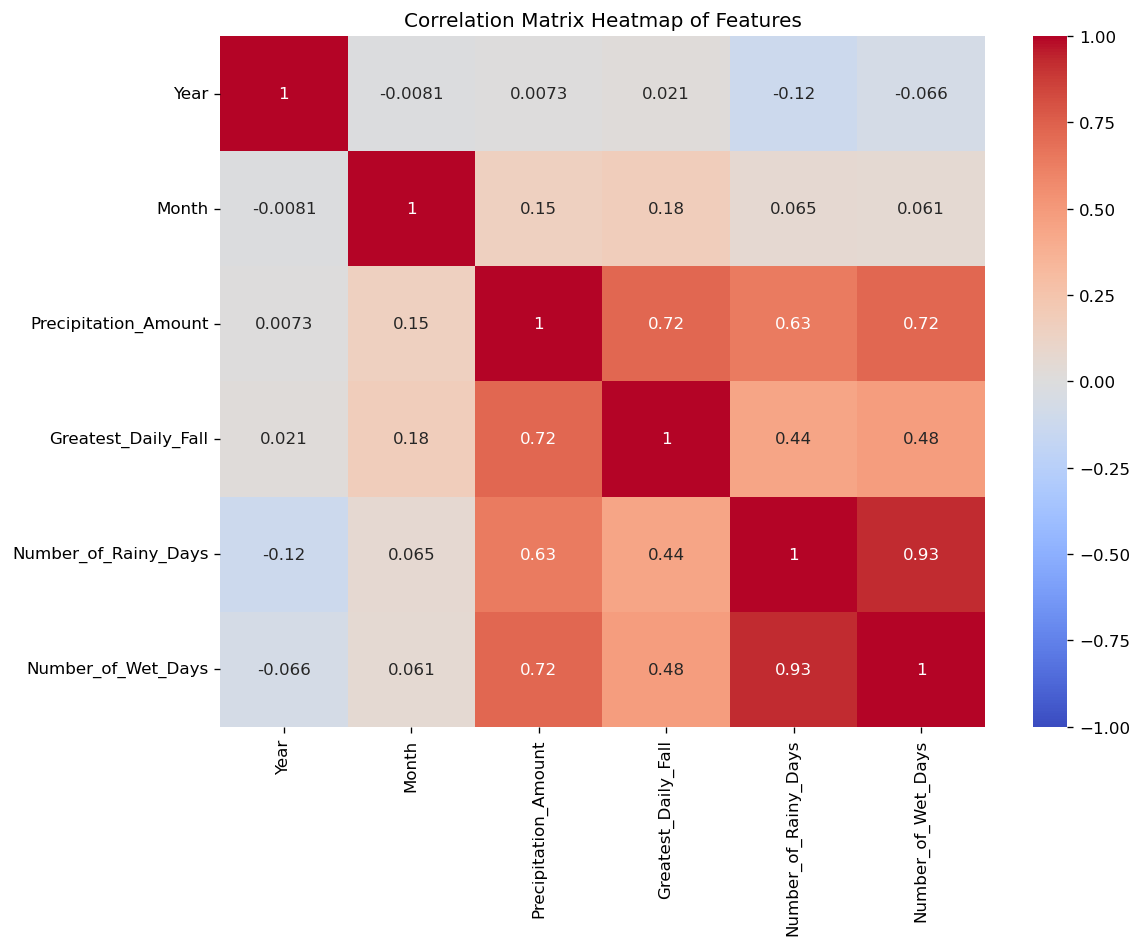

In [29]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap of Features')
plt.tight_layout()
plt.show()

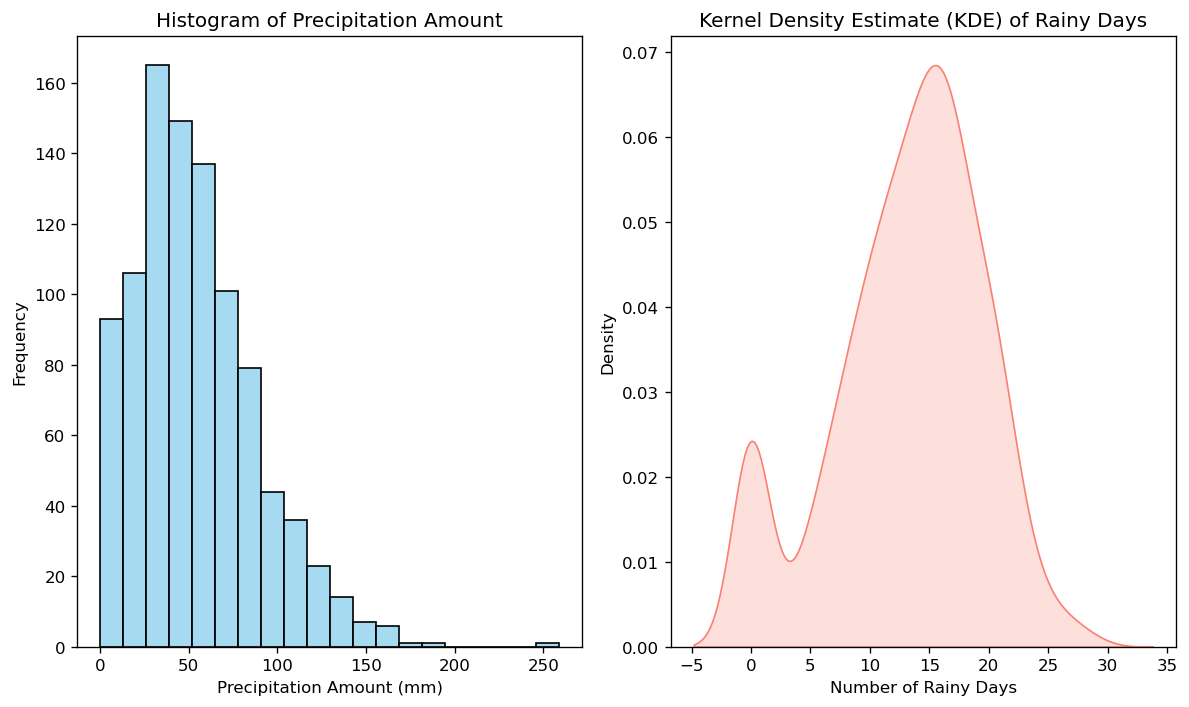

In [30]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Precipitation_Amount'], bins=20, kde=False, color='skyblue')
plt.xlabel('Precipitation Amount (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Precipitation Amount')

plt.subplot(1, 2, 2)
sns.kdeplot(df['Number_of_Rainy_Days'], shade=True, color='salmon')
plt.xlabel('Number of Rainy Days')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) of Rainy Days')

plt.tight_layout()
plt.show()

In [31]:
df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

max_rain_per_year = df.groupby('Year')['Precipitation_Amount'].idxmax()

max_rain_months = df.loc[max_rain_per_year, ['Year', 'Month', 'Precipitation_Amount']]

max_rain_months.reset_index(drop=True, inplace=True)


In [32]:
max_rain_months.to_csv('max_rain_months.csv', index=False)

In [33]:
max_rain_months.head(5)

,Year,Month,Precipitation_Amount
0,1941,1,112
1,1942,9,95
2,1943,1,120
3,1944,9,138
4,1945,7,75


In [34]:
max_rain_months.shape

(83, 3)

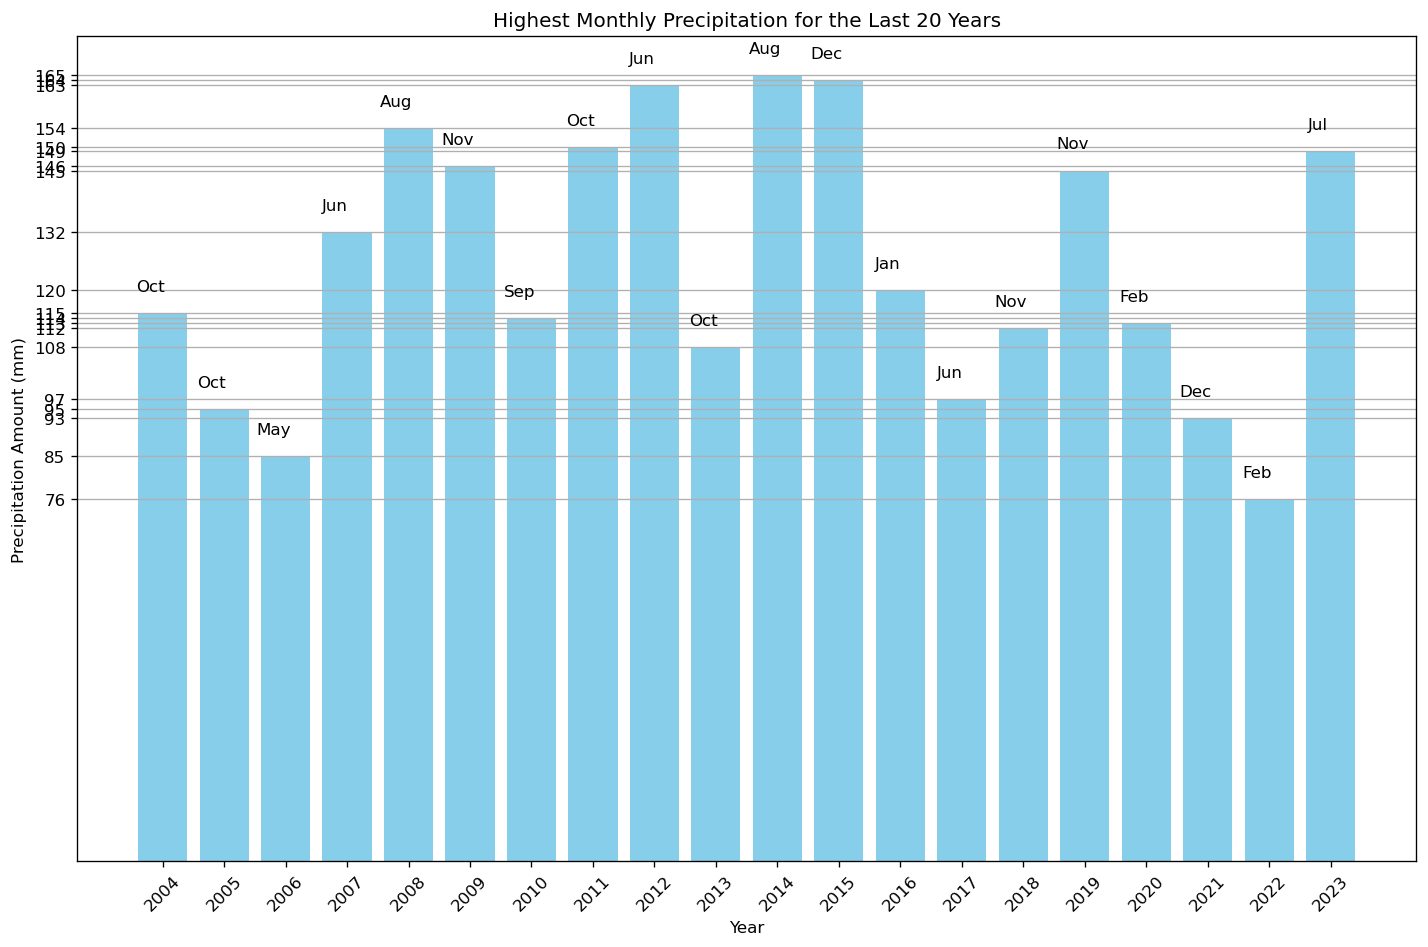

In [35]:
dfm = pd.read_csv('max_rain_months.csv')
dfm_last_20_years = dfm[dfm['Year'] >= 2004]

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

dfm_last_20_years['Month'] = dfm_last_20_years['Month'].apply(lambda x: month_names[int(x) - 1])

max_rain_months = dfm_last_20_years.groupby('Year')['Month'].first().reset_index()

plt.figure(figsize=(12,8))

bars = plt.bar(dfm_last_20_years['Year'].astype(str), dfm_last_20_years['Precipitation_Amount'], color='skyblue')

for i, bar in enumerate(bars):
    if max_rain_months['Month'].iloc[i] in month_names:
        month_idx = month_names.index(max_rain_months['Month'].iloc[i])
        month_abbr = calendar.month_abbr[month_idx + 1]
        plt.text(bar.get_x() + bar.get_width()/2 - 0.2, bar.get_height() + 4,
                 month_abbr, ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Year')
plt.ylabel('Precipitation Amount (mm)')
plt.title('Highest Monthly Precipitation for the Last 20 Years')
plt.xticks(rotation=45)
plt.yticks(dfm_last_20_years['Precipitation_Amount'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


In [37]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

In [38]:
df.head()

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days,date,Year_Month
0,1941,1,112,13,18,18,1941-01-01,1941-1
1,1941,2,69,13,22,15,1941-02-01,1941-2
2,1941,3,111,50,21,13,1941-03-01,1941-3
3,1941,4,68,16,15,12,1941-04-01,1941-4
4,1941,5,66,20,13,10,1941-05-01,1941-5


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Precipitation_Amount'}>],
       [<Axes: title={'center': 'Greatest_Daily_Fall'}>,
        <Axes: title={'center': 'Number_of_Rainy_Days'}>,
        <Axes: title={'center': 'Number_of_Wet_Days'}>],
       [<Axes: title={'center': 'date'}>, <Axes: >, <Axes: >]],
      dtype=object)

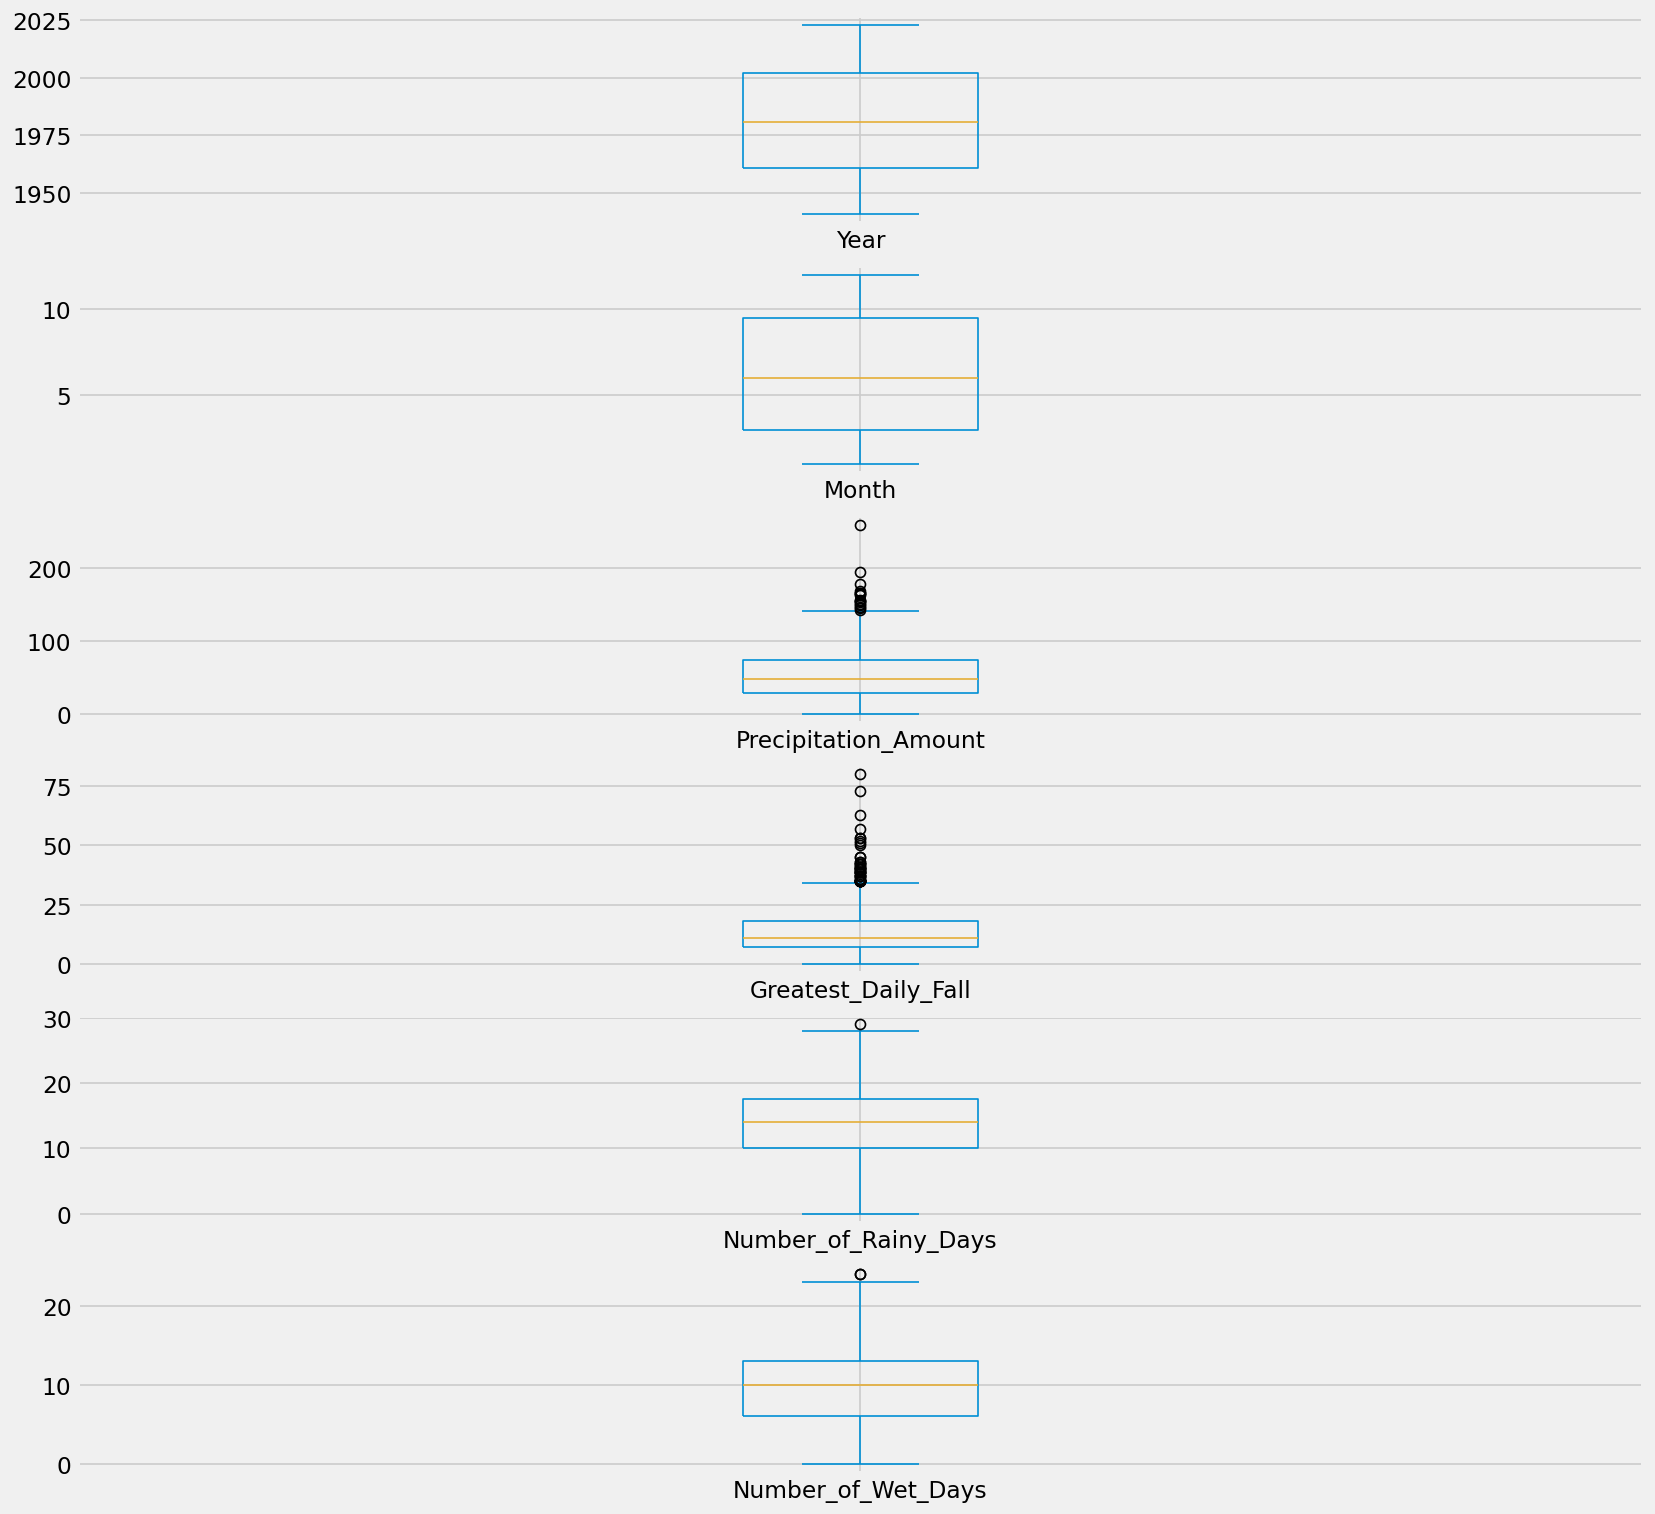

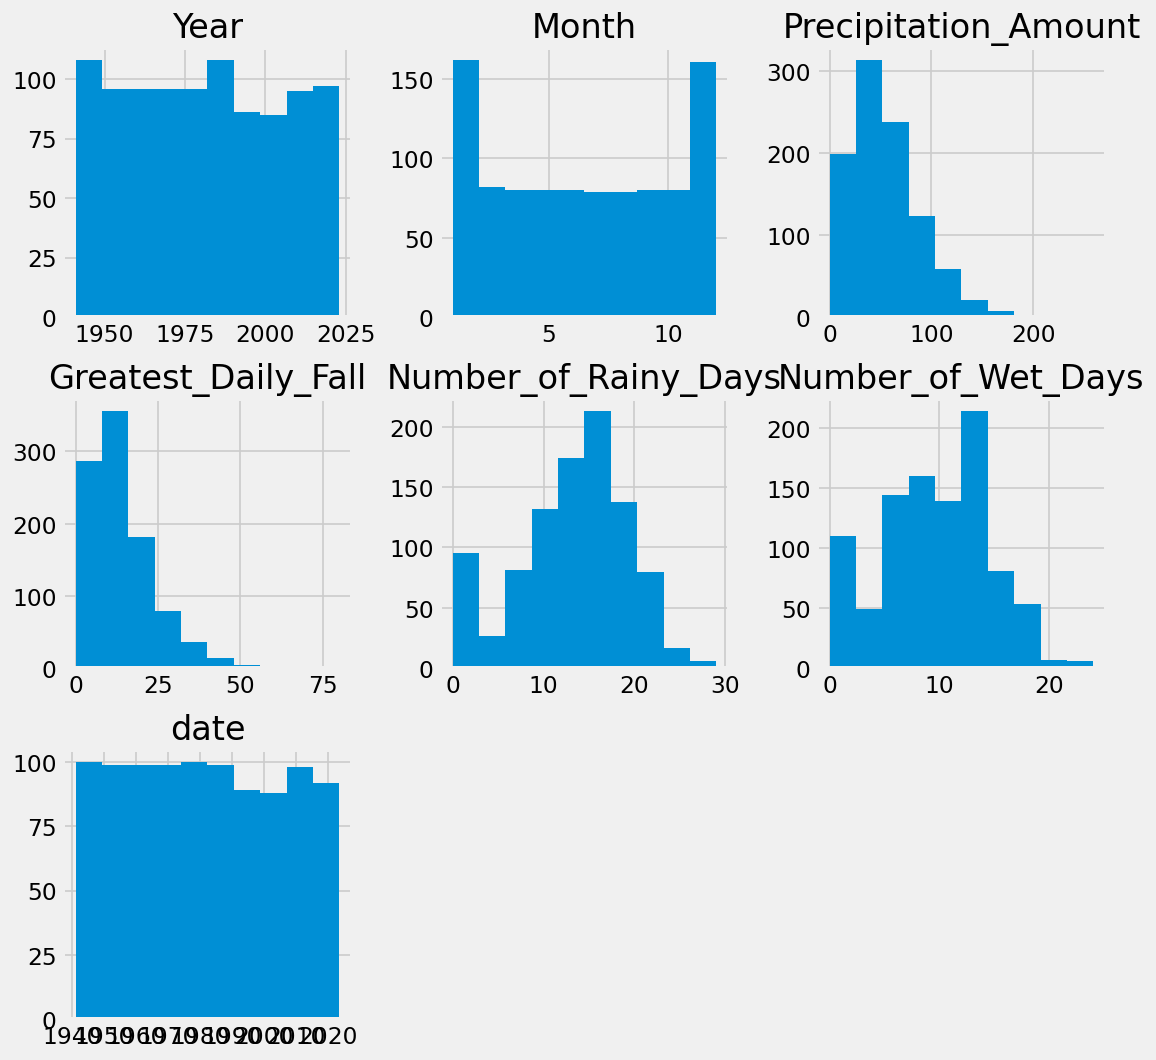

In [39]:
#Check the columns of the dataframe
df.columns

# Check the datatypes of the columns
df.dtypes

# Check the missing values
df.isnull().sum()

# Check the unique values of the columns
df.nunique()

# Check the value counts of the columns
df['Precipitation_Amount'].value_counts()

# Check the percentage of the value counts of the columns
df['Precipitation_Amount'].value_counts(normalize=True)

# Check the summary statistics of the dataframe
df.describe(include='all')

# Check the outliers
df.plot(kind='box', subplots=True, layout=(6,1), figsize=(15,15))

# Check the distribution of the columns
df.hist(figsize=(10,10))

In [40]:
# Group the dataframe by full_date and calculate the mean of the sentiment_score
df = df.groupby('date').mean().reset_index()

In [41]:
# Check the dataframe
print(df.head(3))
print(df.tail(3))

        date    Year  Month  Precipitation_Amount  Greatest_Daily_Fall  \
0 1941-01-01  1941.0    1.0                 112.0                 13.0   
1 1941-02-01  1941.0    2.0                  69.0                 13.0   
2 1941-03-01  1941.0    3.0                 111.0                 50.0   

   Number_of_Rainy_Days  Number_of_Wet_Days  
0                  18.0                18.0  
1                  22.0                15.0  
2                  21.0                13.0  
          date    Year  Month  Precipitation_Amount  Greatest_Daily_Fall  \
960 2023-07-01  2023.0    7.0                 149.0                 25.0   
961 2023-08-01  2023.0    8.0                 118.0                 35.0   
962 2023-09-01  2023.0    9.0                 104.0                 18.0   

     Number_of_Rainy_Days  Number_of_Wet_Days  
960                  22.0                18.0  
961                  12.0                12.0  
962                  15.0                13.0  


In [42]:
start_date = df['date'].min()
end_date = df['date'].max()
idx = pd.date_range(start_date, end_date)

# Tarih aralığını kullanarak eksik tarihleri içeren bir DataFrame oluştur
df_missing_dates = pd.DataFrame({'date': idx})

# Veri çerçevesini eksik tarihlerle birleştir
df = pd.concat([df_missing_dates.set_index('date'), df.set_index('date')], axis=1, join='outer').reset_index()

# Dataframe'i kontrol et
print(df.head(10))

        date    Year  Month  Precipitation_Amount  Greatest_Daily_Fall  \
0 1941-01-01  1941.0    1.0                 112.0                 13.0   
1 1941-01-02     NaN    NaN                   NaN                  NaN   
2 1941-01-03     NaN    NaN                   NaN                  NaN   
3 1941-01-04     NaN    NaN                   NaN                  NaN   
4 1941-01-05     NaN    NaN                   NaN                  NaN   
5 1941-01-06     NaN    NaN                   NaN                  NaN   
6 1941-01-07     NaN    NaN                   NaN                  NaN   
7 1941-01-08     NaN    NaN                   NaN                  NaN   
8 1941-01-09     NaN    NaN                   NaN                  NaN   
9 1941-01-10     NaN    NaN                   NaN                  NaN   

   Number_of_Rainy_Days  Number_of_Wet_Days  
0                  18.0                18.0  
1                   NaN                 NaN  
2                   NaN                 NaN  
3

In [43]:
# Fill in the null values using interpolation
df['Precipitation_Amount'] = df['Precipitation_Amount'].interpolate(method='linear')

Shape: 
(30194, 7)

Columns: 
Index(['date', 'Year', 'Month', 'Precipitation_Amount', 'Greatest_Daily_Fall',
       'Number_of_Rainy_Days', 'Number_of_Wet_Days'],
      dtype='object')

Data Types: 
date                    datetime64[ns]
Year                           float64
Month                          float64
Precipitation_Amount           float64
Greatest_Daily_Fall            float64
Number_of_Rainy_Days           float64
Number_of_Wet_Days             float64
dtype: object

Missing Values: 
date                        0
Year                    29231
Month                   29231
Precipitation_Amount        0
Greatest_Daily_Fall     29231
Number_of_Rainy_Days    29231
Number_of_Wet_Days      29231
dtype: int64

Unique Values: 
date                    30194
Year                       83
Month                      12
Precipitation_Amount    10665
Greatest_Daily_Fall        53
Number_of_Rainy_Days       29
Number_of_Wet_Days         25
dtype: int64

Value Counts: 
0.000000      755

Year                        Axes(0.08,0.740345;0.395455x0.139655)
Month                   Axes(0.554545,0.740345;0.395455x0.139655)
Precipitation_Amount        Axes(0.08,0.572759;0.395455x0.139655)
Greatest_Daily_Fall     Axes(0.554545,0.572759;0.395455x0.139655)
Number_of_Rainy_Days        Axes(0.08,0.405172;0.395455x0.139655)
Number_of_Wet_Days      Axes(0.554545,0.405172;0.395455x0.139655)
dtype: object

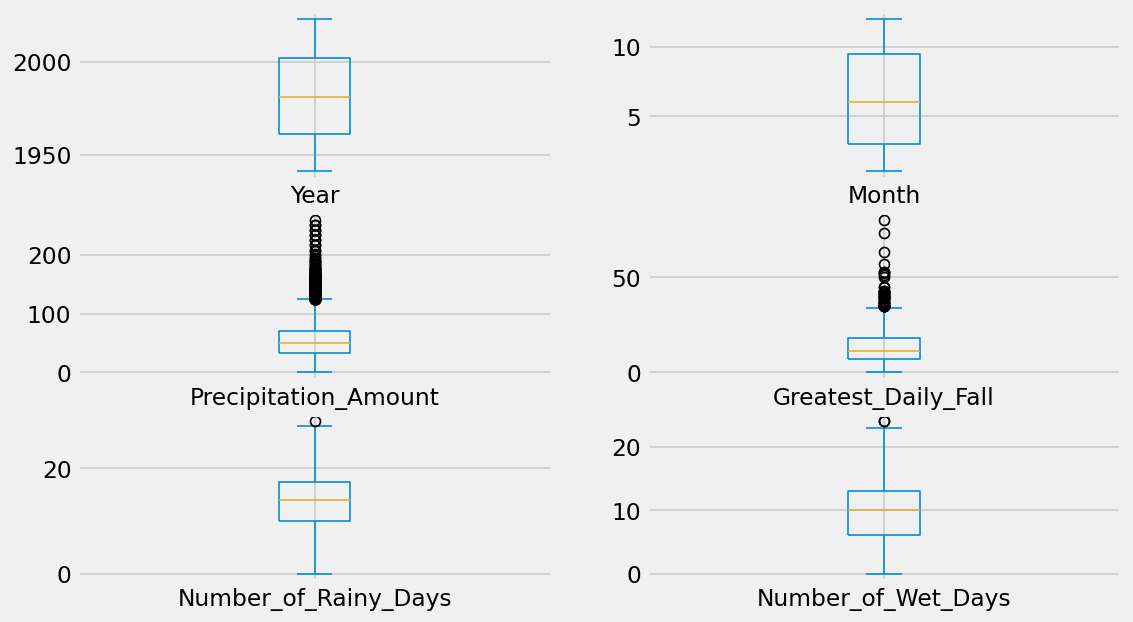

In [44]:
# Perform EDA on the new dataframe
print("Shape: ")
print(df.shape)
print("\n" + "Columns: ")
print(df.columns)
print("\n" + "Data Types: ")
print(df.dtypes)
print("\n" + "Missing Values: ")
print(df.isnull().sum())
print("\n" + "Unique Values: ")
print(df.nunique())
print("\n" + "Value Counts: ")
print(df['Precipitation_Amount'].value_counts())
print("\n" + "Percentage of Value Counts: ")
print(df['Precipitation_Amount'].value_counts(normalize=True))
print("\n" + "Summary Statistics: ")
df.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,10))


In [45]:
df.head()

,date,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days
0,1941-01-01,1941.0,1.0,112.000000,13.0,18.0,18.0
1,1941-01-02,NaN,NaN,110.612903,NaN,NaN,NaN
2,1941-01-03,NaN,NaN,109.225806,NaN,NaN,NaN
3,1941-01-04,NaN,NaN,107.838710,NaN,NaN,NaN
4,1941-01-05,NaN,NaN,106.451613,NaN,NaN,NaN


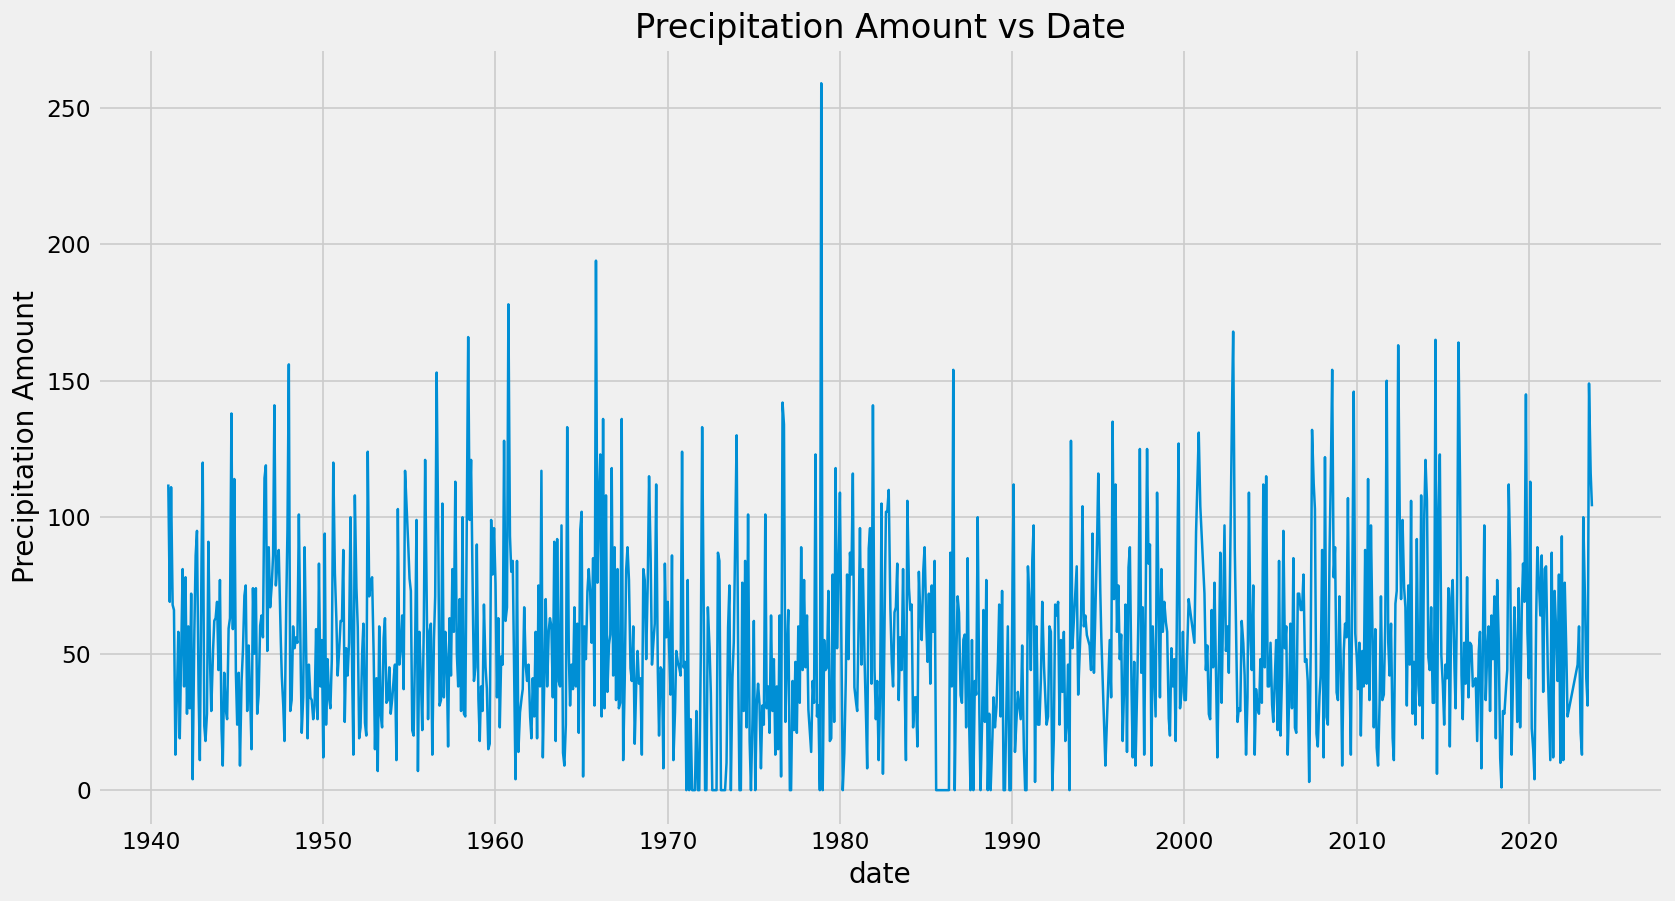

In [46]:
# Plot the sentiment_score
plt.figure(figsize=(15,8))
plt.plot(df['date'], df['Precipitation_Amount'])
plt.xlabel('date')
plt.ylabel('Precipitation Amount')
plt.title('Precipitation Amount vs Date')
plt.show()


In [ ]:
X = df[['Year', 'Month']]
Y = df['Precipitation_Amount'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))  
model.add(Dense(1, activation='linear'))  

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, Y_train, epochs=150, batch_size=32, verbose=2)

Epoch 1/150
755/755 - 2s - loss: nan - 2s/epoch - 3ms/step
Epoch 2/150
755/755 - 2s - loss: nan - 2s/epoch - 2ms/step
Epoch 3/150
755/755 - 2s - loss: nan - 2s/epoch - 2ms/step
Epoch 4/150
755/755 - 2s - loss: nan - 2s/epoch - 2ms/step
Epoch 5/150
755/755 - 1s - loss: nan - 1s/epoch - 2ms/step
Epoch 6/150
755/755 - 1s - loss: nan - 1s/epoch - 2ms/step
Epoch 7/150
755/755 - 1s - loss: nan - 1s/epoch - 2ms/step
Epoch 8/150
755/755 - 2s - loss: nan - 2s/epoch - 2ms/step
Epoch 9/150
755/755 - 1s - loss: nan - 1s/epoch - 2ms/step
Epoch 10/150
755/755 - 2s - loss: nan - 2s/epoch - 2ms/step
Epoch 11/150
755/755 - 1s - loss: nan - 1s/epoch - 2ms/step
Epoch 12/150
755/755 - 1s - loss: nan - 1s/epoch - 2ms/step
Epoch 13/150
755/755 - 2s - loss: nan - 2s/epoch - 2ms/step
Epoch 14/150
755/755 - 2s - loss: nan - 2s/epoch - 2ms/step
Epoch 15/150
755/755 - 2s - loss: nan - 2s/epoch - 2ms/step
Epoch 16/150
755/755 - 1s - loss: nan - 1s/epoch - 2ms/step
Epoch 17/150
755/755 - 2s - loss: nan - 2s/epoch 

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

In [ ]:
scores = model.evaluate(X, Y)
print("Loss: %.2f" % scores)

In [ ]:
predictions = model.predict(X)

In [ ]:
predictions

In [ ]:
rounded = [round(x[0]) for x in predictions]

In [ ]:
rounded

Depending on the results obtained, it seems more logical to re-evaluate the results using a different modem.

# decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train, Y_train)

tree_predictions = tree_model.predict(X_test)

tree_mse = mean_squared_error(Y_test, tree_predictions)
print("Decision Tree Model Mean Squared Error:", tree_mse)

# Support Vector Machines - SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
svm_model = SVR(kernel='rbf') 

svm_model.fit(X_train, Y_train)

svm_predictions = svm_model.predict(X_test)

svm_mse = mean_squared_error(Y_test, svm_predictions)
print("SVM Model Mean Squared Error:", svm_mse)

modelin iyilestirilmesi gerekiyor, kuru gurultulerin tespit edilip silinmesi icin calisicam

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

df['unix_date'] = (df['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df['new_Precipitation_Amount'] = df['Precipitation_Amount'] * 2

df['sum_date_Precipitation'] = df['unix_date'] + df['Precipitation_Amount']

print(df)

In [ ]:
from scipy.stats.mstats import winsorize
from scipy.stats import zscore

In [ ]:
z_scores = (df - df.mean()) / df.std()

# Belirli bir eşik değeri (örneğin, 3) üzerinde olan değerleri outlier olarak tanımlama
outliers = (np.abs(z_scores) > 3).any(axis=1)

# Outlier'ları veri setinden temizleme
df_cleaned = df[~outliers]

# Örnek olarak, 0.05 ve 0.95 yüzdelik dilimlerdeki değerler arasında sınırlama yapalım
df_winsorized = df.apply(lambda x: winsorize(x, limits=[0.05, 0.95]))


In [ ]:
df.head()

In [ ]:
from scipy.stats.mstats import winsorize

# Veri setinizdeki her bir özellik için Z-Skoru hesaplama
z_scores = (df[['Year', 'Month', 'Precipitation_Amount', 'Greatest_Daily_Fall', 'Number_of_Rainy_Days', 'Number_of_Wet_Days']] - df[['Year', 'Month', 'Precipitation_Amount', 'Greatest_Daily_Fall', 'Number_of_Rainy_Days', 'Number_of_Wet_Days']].mean()) / df[['Year', 'Month', 'Precipitation_Amount', 'Greatest_Daily_Fall', 'Number_of_Rainy_Days', 'Number_of_Wet_Days']].std()

# Belirli bir eşik değeri (örneğin, 3) üzerinde olan değerleri outlier olarak tanımlama
outliers = (np.abs(z_scores) > 3).any(axis=1)

# Outlier'ları veri setinden temizleme
df_cleaned = df[~outliers]

# Winsorizing ile outlier'ları sınırlama
df_winsorized = df[['Year', 'Month', 'Precipitation_Amount', 'Greatest_Daily_Fall', 'Number_of_Rainy_Days', 'Number_of_Wet_Days']].apply(lambda x: winsorize(x, limits=[0.05, 0.95]))

# Temizlenmiş veri setini kullanarak modelinizi yeniden eğitme
# Önce X ve Y'yi güncelleyin
X = df_cleaned[['Year', 'Month']]
Y = df_cleaned['Precipitation_Amount'] 

# Daha sonra X ve Y'yi kullanarak modelinizi eğitin

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', 'val_accuracy'])
print(model.history.history.keys())

In [ ]:
train_acc = model.history.history['acc']
val_acc = model.history.history['val_acc']

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

scores = model.evaluate(X_val, Y_val, verbose=0)
print("Validation Accuracy: %.2f%%" % (scores[1]*100))

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print(history.history.keys())

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(X,Y)
print("%s: %.2f%%" % (model.metrics_names[0], scores*100))

In [ ]:
df.reset_index(drop=True, inplace=True)

df['Year'] = [d.year for d in df.date]
df['Month'] = [d.strftime('%b') for d in df.date]
years = df['Year'].unique()

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Precipitation_Amount', data=df, ax=axes[0])
sns.boxplot(x='Month', y='Precipitation_Amount', data=df.loc[~df.Year.isin([1941, 203]), :], ax=axes[1])

axes[0].set_title('Box Plot by Years\n(The Trend)', fontsize=18); 
axes[1].set_title('Box Plot by Months\n(The Seasonality)', fontsize=18)

axes[0].tick_params(axis='x', labelrotation=55)
axes[1].tick_params(axis='x', labelrotation=50)

plt.show()

In [ ]:
annual_rainfall = df.groupby('Year')['Precipitation_Amount'].sum()

def plot_df(df, x, y, title="", xlabel='Year', ylabel='Daily Rainfall Amount', dpi=100):
    plt.figure(figsize=(12,6), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=50)
    plt.grid(True)
    plt.show()

plot_df(df, x=annual_rainfall.index, y=annual_rainfall.values, title='Annual Rainfall Amount in Ireland from 1941 to 2023')

In [ ]:
x = df['Year'].values
y1 = df['Precipitation_Amount'].values

plt.figure(figsize=(16,5), dpi=100)
plt.fill_between(x, y1=y1, where=(y1 >= 0), interpolate=True, color='lightgreen', alpha=0.7, label='Above 0')

plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5, color='black')

plt.title('Daily Rainfall Amount', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Precipitation Amount')
plt.grid(True)
plt.legend()

plt.show()

To measure the imputation performance, I manually introduce missing values to the time series, impute it with above approaches and then measure the mean squared error of the imputed against the actual values.

In [ ]:
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))

columns_with_missing_values = ['Precipitation_Amount', 'Greatest_Daily_Fall', 'Number_of_Rainy_Days', 'Number_of_Wet_Days']

df['unix_date'] = (df['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

for column in columns_with_missing_values:
    f = interp1d(df['unix_date'].values, df[column].values, kind='linear', fill_value='extrapolate')
    df[f'{column}_interp'] = f(df['unix_date'])

mse_values = {}
for column in columns_with_missing_values:
    mse = mean_squared_error(df[column], df[f'{column}_interp'])
    mse_values[column] = mse
    print(f'Mean Squared Error for {column}: {mse:.2f}')

fig, axes = plt.subplots(len(columns_with_missing_values), 1, figsize=(10, 5 * len(columns_with_missing_values)))

for i, column in enumerate(columns_with_missing_values):
    ax = axes[i]
    ax.plot(df['date'], df[column], label='Original')
    ax.plot(df['date'], df[f'{column}_interp'], label='Interpolated')
    ax.set_title(f'Linear Interpolation for {column} - MSE: {mse_values[column]:.2f}')
    ax.legend()

correlation_matrix = df[columns_with_missing_values + [f'{col}_interp' for col in columns_with_missing_values]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Original and Interpolated Values')
plt.show()

In [ ]:
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))

columns_with_missing_values = ['Precipitation_Amount', 'Greatest_Daily_Fall', 'Number_of_Rainy_Days', 'Number_of_Wet_Days']

df['unix_date'] = (df['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

for column in columns_with_missing_values:
    f = interp1d(df['unix_date'].values, df[column].values, kind='linear', fill_value='extrapolate')
    df[f'{column}_interp'] = f(df['unix_date'])

mse_values = {}
for column in columns_with_missing_values:
    mse = mean_squared_error(df[column], df[f'{column}_interp'])
    mse_values[column] = mse
    print(f'Mean Squared Error for {column}: {mse:.2f}')

fig, axes = plt.subplots(len(columns_with_missing_values), 1, figsize=(10, 5 * len(columns_with_missing_values)))

for i, column in enumerate(columns_with_missing_values):
    ax = axes[i]
    ax.plot(df['date'], df[column], label='Original')
    ax.plot(df['date'], df[f'{column}_interp'], label='Interpolated')
    ax.set_title(f'Linear Interpolation for {column} - MSE: {mse_values[column]:.2f}')
    ax.legend()

correlation_matrix = df[columns_with_missing_values + [f'{col}_interp' for col in columns_with_missing_values]].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Original and Interpolated Values')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import kpss

result = kpss(df['Precipitation_Amount'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


According to the results, it can be assumed that the time series is stationary. However, it would be appropriate to perform another test to understand and interpret the characteristics of each time series.

In [ ]:
# ADF Test
from statsmodels.tsa.stattools import adfuller, kpss
result = adfuller(df['Precipitation_Amount'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic (-19.122370675575556), This can be interpreted as evidence that the time series does not have a unit root (it is stationary). p-value (0.0), This value is quite small, even zero. This means that the null hypothesis (that the time series has no unit root) should be rejected. In this case, the time series is considered stationary. Critical Values: In this case, the null hypothesis (that the time series has no unit root) is rejected and the time series is assumed to be stationary.

As a result, according to the given ADF test results, it can be said that the time series is stationary (there is no unit root). This means that the time series can be predicted with a specific model and the trends are more stable. However, before accepting these results as definitive, it is important to consider other properties of the time series and modeling requirements.

In [ ]:
from scipy import signal

detrended = signal.detrend(df.Precipitation_Amount.values)
plt.figure(figsize=(8,5))
plt.plot(detrended)
plt.title('Precipitation Amount whose trend was reduced by removing the least squares fit', fontsize=12)
plt.show()

In [ ]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df['Precipitation_Amount'].values.tolist())

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Precipitation_Amount'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Precipitation_Amount'].tolist(), lags=50, ax=axes[1])

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

In [ ]:
# Lag Plot

from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Precipitation_Amount'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Precipitation Amount', y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
def ApEn(U, m, r):
    """Compute Approximate Entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))


# Veri Seti Üzerinde Approximate Entropy Hesaplama
apen_value = ApEn(df['Precipitation_Amount'], m=2, r=0.2*np.std(df['Precipitation_Amount']))

print(apen_value)


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

df['Month'] = df['Month'].map(month_mapping)

df['Precipitation_Amount'] = df.date.dt.month
grangercausalitytests(df[['Precipitation_Amount', 'Month']], maxlag=2)

As a result, when the p value is 1.0, we can think that there is no causality between the two variables or that the causality process is very low for the tested lag values, so let's observe the same thing during the year.

In [ ]:
df['Precipitation_Amount'] = df.date.dt.year
df['Year']= df['Year'].astype(int)
grangercausalitytests(df[['Precipitation_Amount', 'Year']], maxlag=2)

We can conclude that the "Year" variable does not provide causality to the "Precipitation_Amount" variable for both the first and second lag. So, we can comment that the "Year" variable does not have a significant effect on "Precipitation_Amount". In this case, we can say that it does not make sense to use the "Year" variable to predict or explain the "Precipitation_Amount" variable.

In [ ]:
# Time Series Decomposition
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Precipitation_Amount'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = (df.Precipitation_Amount.values).values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()